In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('Data2.csv',encoding='latin1')

In [3]:
df.head()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa),Result
0,0.000583,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
1,0.001170,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
2,0.002330,13.33,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
3,0.000583,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1
4,0.001170,16.67,0.004,0.01,13.0,0.0031,0.0009,2.0,0.00005,324,1


In [4]:
df.shape

(108, 11)

In [5]:
voids=df[df.Result==1]
voids.shape

(43, 11)

In [6]:
No_voids=df[df.Result==0]
No_voids.shape

(65, 11)

In [7]:
df.groupby('Result').mean()

,Welding speed(m/s),Rotation speed(rps),plate thickness(m),Shoulder\nradius(m),Axial\npressure(Mpa),Pin root\nradius(m),pin tip radius(m),Tilt angle(degree),Thermal\ndiffusivity(m2/s),Yield\nstrength(Mpa)
Result,,,,,,,,,,
0,0.002825,19.079077,0.006042,0.009588,15.685538,0.003287,0.002341,2.092308,0.000057,313.846154
1,0.002594,12.398140,0.006127,0.009665,13.368372,0.003303,0.002362,2.081395,0.000055,317.767442


In [8]:
X=df[['Rotation speed(rps)','Axial\npressure(Mpa)','Yield\nstrength(Mpa)','Welding speed(m/s)']]
X.shape

(108, 4)

In [9]:
Y=df['Result']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)

In [11]:
X_train.head()

,Rotation speed(rps),Axial\npressure(Mpa),Yield\nstrength(Mpa),Welding speed(m/s)
8,20.00,13.00,324,0.00233
98,22.50,23.59,276,0.00200
52,18.34,26.50,352,0.00150
54,15.00,26.50,352,0.00200
107,33.33,8.00,276,0.00025


In [12]:
Y_train

8      1
98     0
52     0
54     0
107    0
      ..
51     0
47     0
73     0
97     0
5      1
Name: Result, Length: 75, dtype: int64

In [13]:
X_test.head()

,Rotation speed(rps),Axial\npressure(Mpa),Yield\nstrength(Mpa),Welding speed(m/s)
38,2.50,13.00,352,0.00167
16,16.68,7.86,324,0.00125
59,4.33,13.00,352,0.00130
17,18.34,7.86,324,0.00125
41,6.67,13.00,352,0.00167


In [14]:
Y_test.head()

38    1
16    1
59    0
17    1
41    0
Name: Result, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [16]:
model.score(X_test,Y_test)

0.7575757575757576

In [17]:
from sklearn import tree

In [18]:
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
dt.score(X_test,Y_test)

0.696969696969697

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
Y_predicted=rf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[14,  4],
       [ 4, 11]], dtype=int64)

In [22]:
rf.score(X_test,Y_test)

0.7575757575757576

Text(8.222222222222223, 0.5, 'Truth')

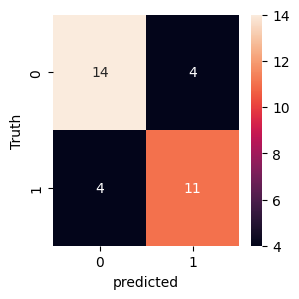

In [23]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [25]:
svm.score(X_test,Y_test)

0.5454545454545454

In [26]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [27]:
NB.fit(X_train,Y_train)

GaussianNB()

In [28]:
NB.score(X_test,Y_test)

0.5151515151515151

In [29]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)       #defing fxn for not write individually
    return model.score(X_test,Y_test)

In [30]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [31]:
scores_lr=[]
scores_svm=[]
scores_rf=[]

for train_index,test_index in skf.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    scores_lr.append(get_score(LogisticRegression(),X_train,X_test,Y_train,Y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,Y_train,Y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=30),X_train,X_test,Y_train,Y_test))

In [32]:
scores_lr

[0.5,
 0.7727272727272727,
 0.5454545454545454,
 0.9047619047619048,
 0.7619047619047619]

In [33]:
scores_svm

[0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.6190476190476191,
 0.6190476190476191]

In [34]:
scores_rf

[0.6363636363636364,
 0.5909090909090909,
 0.4090909090909091,
 0.8571428571428571,
 0.6666666666666666]

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X,Y)

array([0.5       , 0.77272727, 0.54545455, 0.9047619 , 0.76190476])

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X,Y)

array([0.59090909, 0.59090909, 0.59090909, 0.61904762, 0.61904762])

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=30),X,Y)

array([0.59090909, 0.63636364, 0.54545455, 0.85714286, 0.66666667])

Separating Alloys

In [38]:
AA2024=X[:38]
AA2219=X[39:70]
AA6061=X[71:]
result_1=Y[:38]
result_2=Y[39:70]
result_3=Y[71:]

In [39]:
AA6061.tail()

,Rotation speed(rps),Axial\npressure(Mpa),Yield\nstrength(Mpa),Welding speed(m/s)
103,7.50,13.0,276,0.001000
104,10.83,13.0,276,0.001000
105,16.67,8.0,276,0.000250
106,16.67,8.0,276,0.000333
107,33.33,8.0,276,0.000250


Alloy AA2024

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(AA2024,result_1,test_size=0.2,random_state=100)

In [41]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)       #defing fxn for not write individually
    return model.score(x_test,y_test)

In [42]:
lr=[]
DT=[]
rf=[]
Nb=[]

lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
DT.append(get_score(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test))
rf.append(get_score(RandomForestClassifier(n_estimators=30),x_train,x_test,y_train,y_test))
Nb.append(get_score(GaussianNB(),x_train,x_test,y_train,y_test))

In [43]:
lr

[0.625]

In [44]:
DT

[0.5]

In [45]:
rf

[0.75]

In [46]:
Nb

[0.5]

In [47]:
y_predicted=NB.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[2, 1],
       [2, 3]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

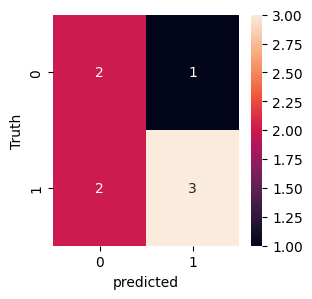

In [48]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

Alloy AA2219

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(AA2219,result_2,test_size=0.2)

In [50]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)       #defing fxn for not write individually
    return model.score(x_test,y_test)

In [51]:
lr=[]
DT=[]
rf=[]
Nb=[]

lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
DT.append(get_score(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test))
rf.append(get_score(RandomForestClassifier(n_estimators=30),x_train,x_test,y_train,y_test))
Nb.append(get_score(GaussianNB(),x_train,x_test,y_train,y_test))

In [52]:
lr

[0.8571428571428571]

In [53]:
Nb

[0.8571428571428571]

In [54]:
rf

[1.0]

In [55]:
DT

[1.0]

Alloy AA6061

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(AA6061,result_3,test_size=0.2,random_state=20)

In [57]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)       #defing fxn for not write individually
    return model.score(x_test,y_test)

In [58]:
lr=[]
DT=[]
rf=[]
Nb=[]

lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
DT.append(get_score(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test))
rf.append(get_score(RandomForestClassifier(n_estimators=30),x_train,x_test,y_train,y_test))
Nb.append(get_score(GaussianNB(),x_train,x_test,y_train,y_test))

In [59]:
lr

[0.875]

In [60]:
rf

[0.75]

In [61]:
DT

[0.625]

In [62]:
Nb

[0.75]

PCA

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.drop('Result',axis='columns'))
df_scaled

array([[-0.64321271, -0.40362447, -0.58845602, ..., -0.46204236,
        -0.69743978,  0.27601528],
       [-0.4675795 , -0.40362447, -0.58845602, ..., -0.46204236,
        -0.69743978,  0.27601528],
       [-0.12050196, -0.40362447, -0.58845602, ..., -0.46204236,
        -0.69743978,  0.27601528],
       ...,
       [-0.7428479 ,  0.03278647, -0.8719228 , ..., -0.46204236,
         1.3564504 , -1.2658632 ],
       [-0.7180139 ,  0.03278647, -0.8719228 , ..., -0.46204236,
         1.3564504 , -1.2658632 ],
       [-0.7428479 ,  2.20961469, -0.8719228 , ..., -0.46204236,
         1.3564504 , -1.2658632 ]])

In [64]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.8)
X_pca=pca.fit_transform(df_scaled)
X_pca.shape

(108, 4)

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.3)

In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [67]:
nb.fit(X_train,Y_train)

GaussianNB()

In [68]:
nb.score(X_test,Y_test)

0.5454545454545454

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [70]:
rf.score(X_test,Y_test)

0.7878787878787878